<a href="https://colab.research.google.com/github/strejo4/ColabFiles_UACJ_PADP/blob/main/Modelo_Avance_Proyecto_2do_SergioTrejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avance del Proyecto

Analisis y Prediccion de Defectos en Manufactura


**Etapas: Métricas de Calidad de los Datos, Análisis Descriptivo y Preprocesamiento**

Nombre: Sergio Trejo

Matrícula: 261539

Fecha: 1 de Octubre, 2025

**Enlace GitHub**: https://github.com/strejo4/ColabFiles_UACJ_PADP/blob/main/Modelo_Avance_Proyecto_2do_SergioTrejo.ipynb

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1) Introducción
## - Descripción del problema: ¿Qué queremos analizar o predecir?
  * En la manufactura, uno de los principales retos es reducir la cantidad de defectos en los productos terminados. Los defectos ocasionan retrabajos, desperdicio de materiales, mayores costos y retrasos en las entregas. Para mejorar la calidad es fundamental identificar qué factores del proceso influyen en la aparición de defectos y, con base en ello, anticipar problemas antes de que ocurran.

## - Objetivo del análisis: ¿Qué impacto tendrá este análisis?
  *  Obtener una visión descriptiva del comportamiento de las variables.  
  *  Descubrir patrones y relaciones que influyen en la calidad o defectos.  
  *  Construir un modelo predictivo que clasifique los lotes en alta o baja   cantidad de defectos con buena presición.  


## 2) Descripción del dataset


## - Explicación de la fuente de datos: ¿Cuáles son las fuentes de datos?, ¿Qué formato tienen los datos (CSV, SQL, API, etc.)?, ¿Cuántas observaciones y variables contiene el dataset?
El dataset fue obtenido de la plataforma Kaggle, bajo el nombre *Predicting Manufacturing Defects Dataset* (https://www.kaggle.com/datasets/rabieelkharoua/predicting-manufacturing-defects-dataset). Está en formato CSV y son datos estructurados que contienen un total de 3240 registros (filas) y 17 variables (columnas).  
Las 16 variables representan factores relacionados con producción, calidad, inventario, energía, mantenimiento y productividad; mientras que la variable objetivo, llamada DefectStatus, indica si un lote presenta alta cantidad de defectos (1) o baja cantidad de defectos (0).





In [20]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

#Cargar el dataset desde el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/manufacturing_defect_dataset.csv', encoding='latin1')

#dimensiones del DataSet
print("\nDimensiones del DataSet:\n ", df.shape)
print(df.head())
print(df.info())


Dimensiones del DataSet:
  (3240, 17)
   ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
0               202    13175.403783        86.648534              1   
1               535    19770.046093        86.310664              4   
2               960    19060.820997        82.132472              0   
3               370     5647.606037        87.335966              5   
4               206     7472.222236        81.989893              3   

   DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
0    3.121492     63.463494                 9            0.052343   
1    0.819531     83.697818                20            4.908328   
2    4.514504     90.350550                 1            2.464923   
3    0.638524     67.628690                 8            4.692476   
4    3.867784     82.728334                 9            2.746726   

   InventoryTurnover  StockoutRate  WorkerProductivity  SafetyIncidents  \
0           8.630515      0.081322          

## **- Explicación sobre problemas en la carga de Datos y el Código para la carga de datos desde archivos (bibiotecas, etc.)**

- El dataset se cargó correctamente con 3240 filas y 17 columnas.  
- No se detectaron problemas de codificación ni de delimitadores.  
- Los nombres de las variables en las columnas están correctamente estructurados para su análisis. Ya vienen en formato camel case


## **Identificación de Tipos de Datos**
* Al revisar el dataset se encontró que todas las variables son de tipo numérico en Python (int64 y float64). Según su naturaleza:
* DefectStatus es una variable cualitativa nominal (categórica binaria).
* 4 variables son cuantitativas discretas: ProductionVolume, DeliveryDelay, MaintenanceHours, SafetyIncidents.
* 12 variables son cuantitativas continuas: ProductionCost, SupplierQuality, DefectRate, QualityScore, DowntimePercentage, InventoryTurnover, StockoutRate, WorkerProductivity, EnergyConsumption, EnergyEfficiency, AdditiveProcessTime, AdditiveMaterialCost.

## **Limitaciones del Dataset:**

* Segun Kaggle, la variable objetivo esta desbalanceada, lo que puede afectar modelos predictivos sin no se aplican tecnicas de desbalanceo.
* Al ser datos sinteticos, no asegura que refleje completamente procesos reales de manufactura.
* Las variables no están en la misma escala, lo que puede sesgar la interpretación de métricas de distancia y modelos sensibles a magnitudes.
* El dataset no incluye informacion temporal, por lo que no es posible establecer cuasas/efecto (ejemplo: mantenimiento antes o despues del defecto)
* Otra es la correlacion baja entre las variables de forma lineal.


Resumen: Este dataset es adecuado para aplicar técnicas de analítica descriptiva y predictiva porque cuenta con un número suficiente de observaciones, variables numéricas fáciles de manipular y una variable objetivo binaria que permite desarrollar modelos de clasificación.

## 3) Preguntas de análisis descriptivo

## - Preguntas a responder con el AD

0. Estadisticas Basicas Aplicadas
1. Cual es la distribución de la variable objetivo DefectStatus?
2. Cual es la tendencia central (media, mediana) de las variables numéricas?
3. Que tan dispersos estan los datos? (desviacion estandar, rango, cuartiles).
4. Como se relacionan las variables entre productos defectuosos y no defectuosos?
5. Existen valores atipicos en variables numericas?
6. Distribuciones de las variables numericas, que forma tienen?
7. Pruebas de normalizacion, las variables numericas tienen distribucion normal?


## 4) Métricas de calidad de los datos

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


#Crear un dataFrame llamado diccionario con el nombre de  variable, tipo de dato, y valores nulos:
diccionario = pd.DataFrame({"Variable": df.columns, "Tipo de dato": df.dtypes.astype(str), "Valores Nulos": df.isna().sum(), "Valores unicos": df.nunique(), "Duplicados DataSet": [df.duplicated().sum()] * len(df.columns)}).reset_index(drop=True); print(diccionario)
display(diccionario)


#Accuracyd/Exactitud
print("\n")
print("Exactitud de los datos")
# 1. Variables tipo porcentaje (0 a 100)
porcentaje_variables = ["QualityScore", "SupplierQuality", "WorkerProductivity",
                   "EnergyEfficiency", "DowntimePercentage", "StockoutRate"]

for var in porcentaje_variables:
    outliers = df[(df[var] < 0) | (df[var] > 100)]
    print(f"{var}: registros fuera de rango (0-100) = {outliers.shape[0]}")

# 2. Variables de costo (no negativas)
costo_variables = ["ProductionCost", "AdditiveMaterialCost"]

for var in costo_variables:
    outliers = df[df[var] < 0]
    print(f"{var}: registros con valores negativos = {outliers.shape[0]}")

# 3. Variables de conteo/tiempo (no negativas)
conteo_variables = ["ProductionVolume", "DeliveryDelay", "MaintenanceHours", "SafetyIncidents", "AdditiveProcessTime", "EnergyConsumption"]

for var in conteo_variables:
    outliers = df[df[var] < 0]
    print(f"{var}: registros con valores negativos = {outliers.shape[0]}")

# 4. Variable binaria (solo 0 o 1)
valores_defectstatus = df["DefectStatus"].unique()
print("Valores encontrados en DefectStatus:", valores_defectstatus)

#Consistencia
print("\n")
print("Consistencia de los datos")
for col in df.columns:
    tipos = df[col].apply(type).unique()
    if len(tipos) > 1:
        print(f"La columna {col} tiene mezcla de tipos: {tipos}")
    else:
        print(f'{col}: No se encontraron inconsistencias')




                Variable Tipo de dato  Valores Nulos  Valores unicos  \
0       ProductionVolume        int64              0             862   
1         ProductionCost      float64              0            3240   
2        SupplierQuality      float64              0            3240   
3          DeliveryDelay        int64              0               6   
4             DefectRate      float64              0            3240   
5           QualityScore      float64              0            3240   
6       MaintenanceHours        int64              0              24   
7     DowntimePercentage      float64              0            3240   
8      InventoryTurnover      float64              0            3240   
9           StockoutRate      float64              0            3240   
10    WorkerProductivity      float64              0            3240   
11       SafetyIncidents        int64              0              10   
12     EnergyConsumption      float64              0            

,Variable,Tipo de dato,Valores Nulos,Valores unicos,Duplicados DataSet
0,ProductionVolume,int64,0,862,0
1,ProductionCost,float64,0,3240,0
2,SupplierQuality,float64,0,3240,0
3,DeliveryDelay,int64,0,6,0
4,DefectRate,float64,0,3240,0
5,QualityScore,float64,0,3240,0
6,MaintenanceHours,int64,0,24,0
7,DowntimePercentage,float64,0,3240,0
8,InventoryTurnover,float64,0,3240,0
9,StockoutRate,float64,0,3240,0




Exactitud de los datos
QualityScore: registros fuera de rango (0-100) = 0
SupplierQuality: registros fuera de rango (0-100) = 0
WorkerProductivity: registros fuera de rango (0-100) = 0
EnergyEfficiency: registros fuera de rango (0-100) = 0
DowntimePercentage: registros fuera de rango (0-100) = 0
StockoutRate: registros fuera de rango (0-100) = 0
ProductionCost: registros con valores negativos = 0
AdditiveMaterialCost: registros con valores negativos = 0
ProductionVolume: registros con valores negativos = 0
DeliveryDelay: registros con valores negativos = 0
MaintenanceHours: registros con valores negativos = 0
SafetyIncidents: registros con valores negativos = 0
AdditiveProcessTime: registros con valores negativos = 0
EnergyConsumption: registros con valores negativos = 0
Valores encontrados en DefectStatus: [1 0]


Consistencia de los datos
ProductionVolume: No se encontraron inconsistencias
ProductionCost: No se encontraron inconsistencias
SupplierQuality: No se encontraron inconsis

## **Cantidad de Valores nulos**
* Al aplicar df.isna().sum() se encontró que ninguna columna contiene valores nulos. El dataset está completo y no requiere imputar o remplazar valores nulos.

## **Metricas de los datos**
* Completitud: el dataset esta 100 % completo, no se encontraron valores nulos en ninguna columna  
* Accuracy o exactitud: las revisiones de rangos confirmaron que no existen valores fuera de rango en variables porcentuales (0 a 100), ni valores negativos en costos, conteos o tiempos. La variable DefectStatus solo contiene valores validos (0 y 1)  
* Unicidad y duplicados: no se identificaron registros duplicados en el dataset, por lo que no hay redundancia de informacion  
* Consistencia y Tipos de datos: todos los tipos son correctos, no fue necesario realizar conversiones  
* Escalas: las variables estan en diferentes escalas (ejemplo: ProductionCost en miles y SupplierQuality en 0 a 100), lo cual no es un error de calidad pero requerira estandarizacion o normalizacion en fases posteriores  


**Duplicados:**
* En este dataset no se encontraron registros duplicados

**Explicación sobre cada una de las problemáticas encontradas, las soluciones y el codigo**

  * Tipos de datos: Todos los tipos son correctos, no fue necesario convertir columnas.
  * Valores nulos: No se detectaron, por lo que no fue necesario realizar cambios.
  * En general, la calidad de los datos es adecuada para el analisis, ya que no se detectaron problemas de completitud, validez o duplicacion. El dataset esta listo para avanzar a las siguientes fases de analisis descriptivo y exploratorio.


## 5) Análisis descriptivo de los datos

## 0. Estadisticas Basicas  Aplicadas



In [22]:
#Estadisticas basicas aplicadas
estadisticas = df.drop(columns=['DefectStatus']).describe()
print("\nResumen estadistico de las variables numericas:\n", estadisticas)


Resumen estadistico de las variables numericas:
        ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
count       3240.000000     3240.000000      3240.000000    3240.000000   
mean         548.523148    12423.018476        89.833290       2.558951   
std          262.402073     4308.051904         5.759143       1.705804   
min          100.000000     5000.174521        80.004820       0.000000   
25%          322.000000     8728.829280        84.869219       1.000000   
50%          549.000000    12405.204656        89.704861       3.000000   
75%          775.250000    16124.462428        94.789936       4.000000   
max          999.000000    19993.365549        99.989214       5.000000   

        DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
count  3240.000000   3240.000000       3240.000000         3240.000000   
mean      2.749116     80.134272         11.476543            2.501373   
std       1.310154     11.611750          6.872684  

## Interpretacion de las variables numericas

### ProductionVolume
- Media: 548.52  
- Mediana: 549.00  
- Rango: 100.00 a 999.00  
- Interpretacion: los volumenes de produccion estan bastante distribuidos en todo el rango, con concentracion en valores medios-altos  

### ProductionCost
- Media: 12423.02  
- Mediana: 12405.20  
- Rango: 5000.17 a 19993.37  
- Interpretacion: los costos de produccion son muy variables, desde procesos economicos hasta procesos de alto costo  

### SupplierQuality
- Media: 89.83  
- Mediana: 89.70  
- Rango: 80.00 a 99.99  
- Interpretacion: los proveedores mantienen una calidad alta y estable, con poca dispersion  

### DeliveryDelay
- Media: 2.56  
- Mediana: 3.00  
- Rango: 0.00 a 5.00  
- Interpretacion: los retrasos en las entregas suelen ser bajos, aunque existen casos sin retraso  

### DefectRate
- Media: 2.75  
- Mediana: 2.71  
- Rango: 0.50 a 5.00  
- Interpretacion: la tasa de defectos se concentra en valores bajos, pero algunas lineas presentan mayor incidencia  

### QualityScore
- Media: 80.13  
- Mediana: 80.27  
- Rango: 60.01 a 99.99  
- Interpretacion: la calidad final del producto es generalmente alta, con pocas observaciones de baja calidad  

### MaintenanceHours
- Media: 11.48  
- Mediana: 12.00  
- Rango: 0.00 a 23.00  
- Interpretacion: las horas de mantenimiento varian entre lineas, con un promedio de 11 a 12 horas  

### DowntimePercentage
- Media: 2.50  
- Mediana: 2.47  
- Rango: 0.00 a 5.00  
- Interpretacion: el tiempo de inactividad en promedio es bajo, pero algunas lineas alcanzan el 5 %  

### InventoryTurnover
- Media: 6.02  
- Mediana: 6.02  
- Rango: 2.00 a 10.00  
- Interpretacion: la rotacion de inventario es moderada, cercana a 6, lo que refleja estabilidad en la operacion  

### StockoutRate
- Media: 0.05  
- Mediana: 0.05  
- Rango: 0.00 a 0.10  
- Interpretacion: el desabasto es bajo en general, con pocas observaciones criticas  

### WorkerProductivity
- Media: 90.04  
- Mediana: 90.13  
- Rango: 80.00 a 100.00  
- Interpretacion: la productividad de los trabajadores es alta y consistente  

### SafetyIncidents
- Media: 4.59  
- Mediana: 5.00  
- Rango: 0.00 a 9.00  
- Interpretacion: existen incidentes de seguridad en varias observaciones, con un promedio de 5 incidentes  

### EnergyConsumption
- Media: 2988.49  
- Mediana: 2996.82  
- Rango: 1000.72 a 4997.07  
- Interpretacion: el consumo de energia muestra variabilidad importante, relacionado con la escala de produccion  

### EnergyEfficiency
- Media: 0.30  
- Mediana: 0.30  
- Rango: 0.10 a 0.50  
- Interpretacion: la eficiencia energetica es moderada, con algunas lineas destacando por mayor eficiencia  

### AdditiveProcessTime
- Media: 5.47  
- Mediana: 5.44  
- Rango: 1.00 a 10.00  
- Interpretacion: el tiempo del proceso aditivo se concentra en valores medios, con dispersion limitada  

### AdditiveMaterialCost
- Media: 299.52  
- Mediana: 299.73  
- Rango: 100.21 a 499.98  
- Interpretacion: el costo de materiales aditivos varian de forma moderada, concentrados alrededor de los 300  


### Conclusion general de las estadisticas descriptivas:

* En general, las variables del dataset muestran un comportamiento estable y coherente con procesos de manufactura.  
* Las variables relacionadas con calidad y productividad (SupplierQuality, WorkerProductivity, QualityScore) presentan valores altos y poca dispersion, lo que indica consistencia en estos aspectos.  
* En contraste, variables como ProductionCost, EnergyConsumption y MaintenanceHours reflejan mayor variabilidad, lo que sugiere diferencias significativas entre lineas o lotes de produccion.  

* El analisis confirma que los datos son adecuados para continuar con el estudio, pues permiten identificar tanto factores estables como otros que podrian estar asociados a la aparicion de defectos.



## 1. Cual es la distribución de la variable objetivo DefectStatus?

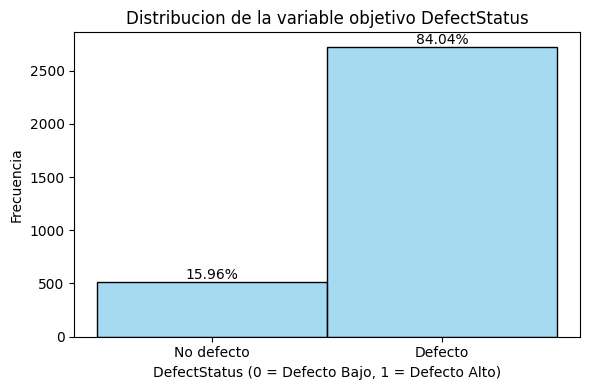

In [23]:
#Proporcion de DefecStatus
plt.figure(figsize=(6,4))
sns.histplot(df['DefectStatus'], bins=2, discrete=True, color='skyblue',edgecolor='black')
plt.title("Distribucion de la variable objetivo DefectStatus")
plt.xlabel("DefectStatus (0 = Defecto Bajo, 1 = Defecto Alto)")
plt.ylabel("Frecuencia")
plt.xticks([0, 1], ['No defecto', 'Defecto'])
counts = df['DefectStatus'].value_counts()
percentage = df['DefectStatus'].value_counts(normalize=True) * 100
plt.text(0, counts[0], f'{percentage[0]:.2f}%', ha='center', va='bottom')
plt.text(1, counts[1], f'{percentage[1]:.2f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()




##Desbalance de la variable objetivo:

* DefectStatus solo tiene dos categorías: 0 = defecto bajo y categoria |1 = defecto alto.

* Se encontró que el 84 % de los registros están en la categoria 1 y solo el 16 % en la categoria 0.

* Esto comprueba el desbalance que en Kaggle se menciona y esto se llama desbalance: significa que el modelo de machine learning aprendera mucho mejor a predecir la categoria 1, porque es la de mayor frecuencia, pero puede equivocarse mas con la categoria 0.

## 2. Cual es la tendencia central (media, mediana) de las variables numéricas?

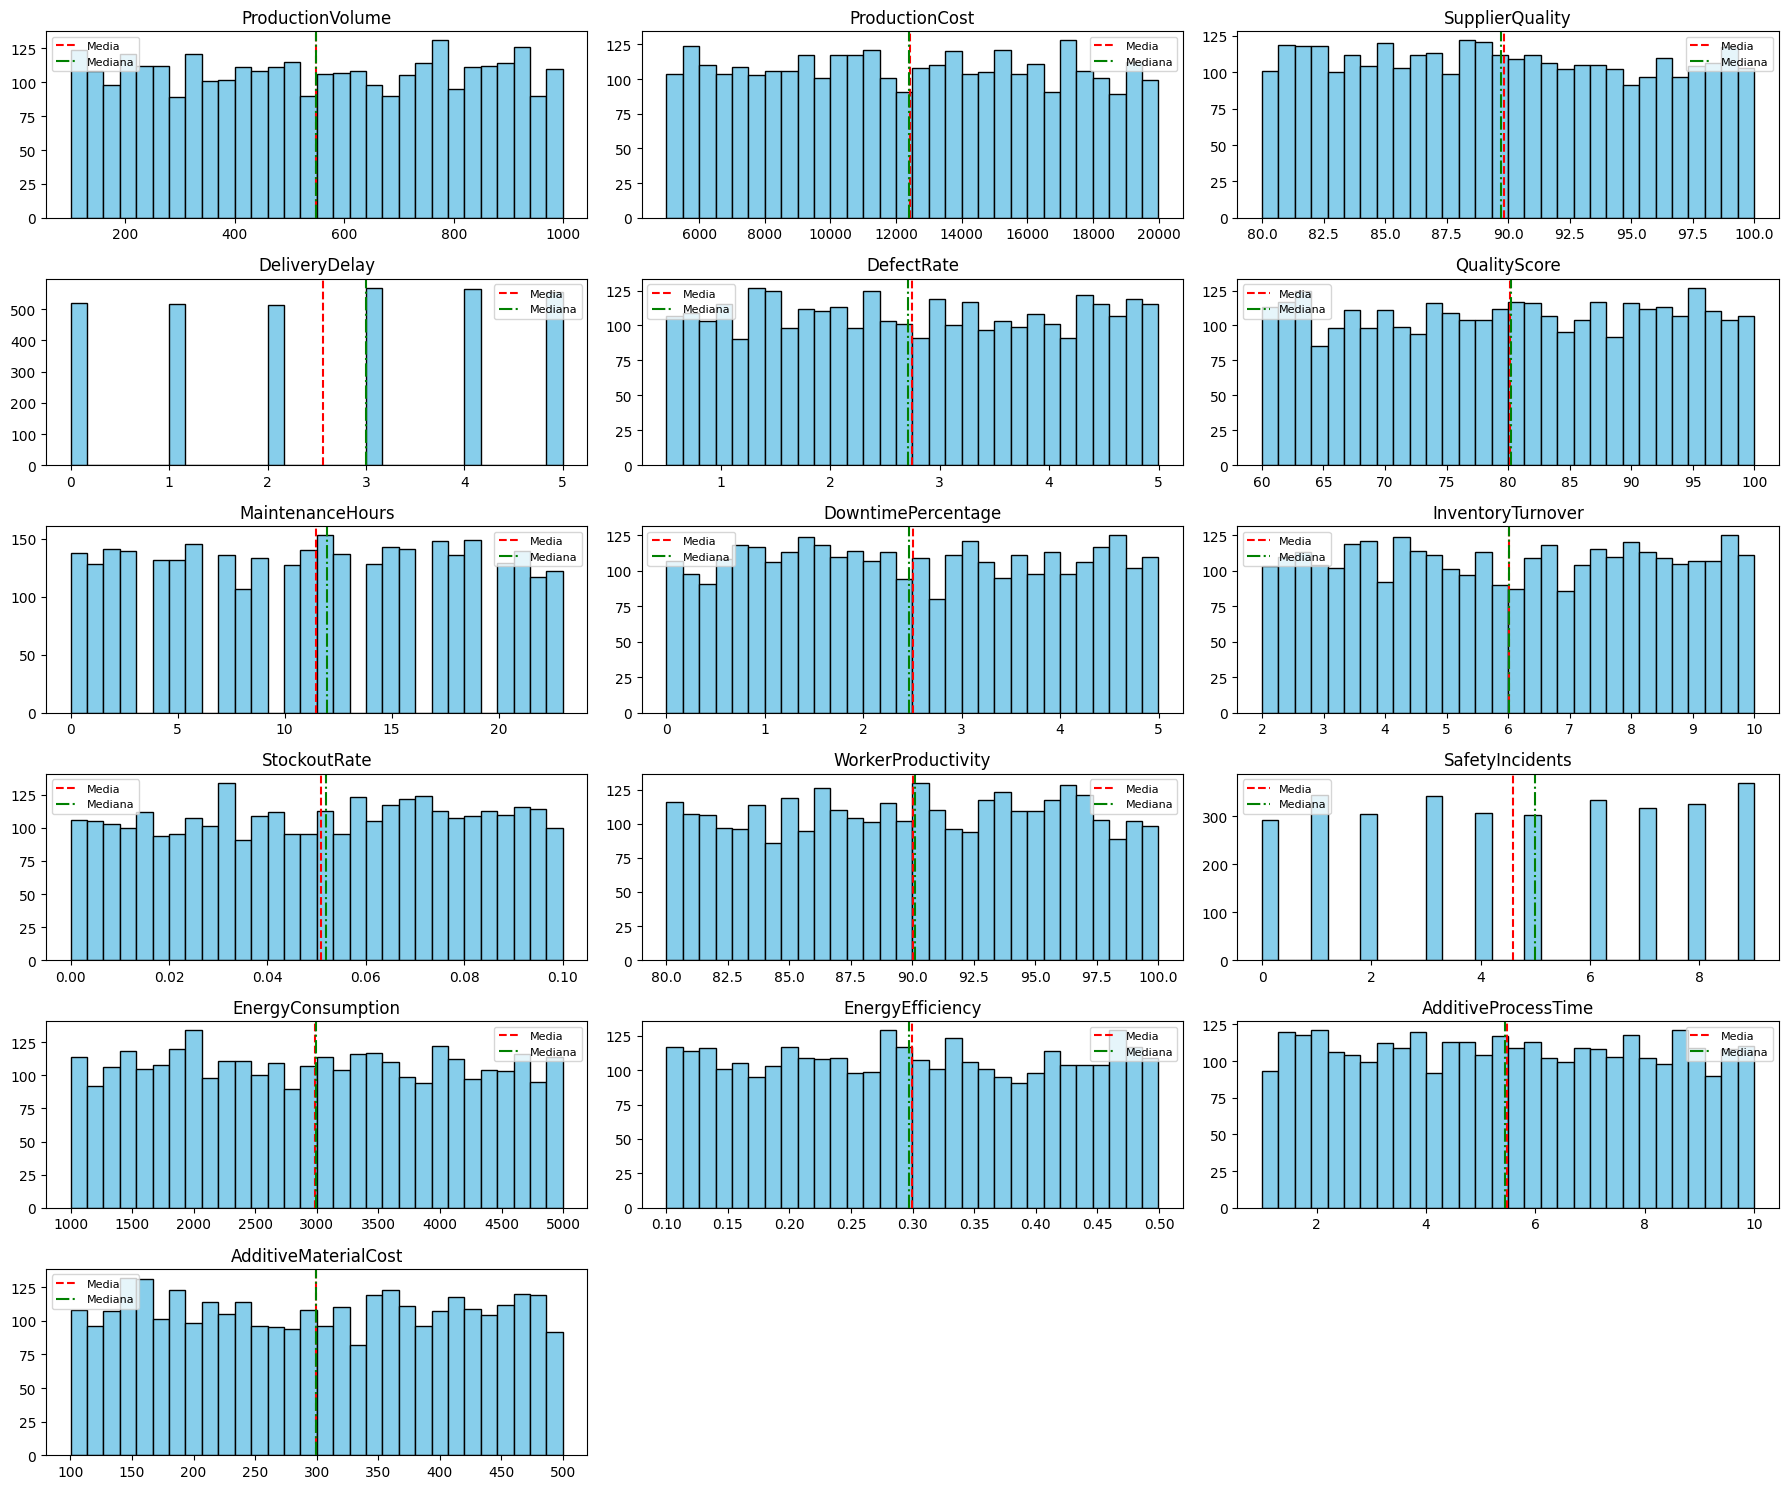

In [24]:
# Calcular medias y medianas
# Seleccionar solo columnas numericas, excepto la variable objetivo
columnas_numericas = df.drop(columns=["DefectStatus"]).select_dtypes(include=["int64","float64"]).columns

# Definir el layout de subplots
n_cols = 3
n_rows = (len(columnas_numericas) // n_cols) + 1

plt.figure(figsize=(18, 15))

# Crear histogramas con lineas de media y mediana
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col], bins=30, color="skyblue", edgecolor="black")
    plt.axvline(df[col].mean(), color="red", linestyle="--", label="Media")
    plt.axvline(df[col].median(), color="green", linestyle="-.", label="Mediana")
    plt.title(f"{col}", fontsize=12)
    plt.legend(fontsize=8)

plt.tight_layout()
plt.show()


### Conclusion sobre la tendencia central

* Las variables numericas presentan medias y medianas consistentes que permiten resumir su comportamiento general.  
* La mayoria de las variables de calidad y productividad (SupplierQuality, WorkerProductivity, QualityScore) tienen valores altos y estables en torno a sus medianas.  
* Variables como ProductionCost y EnergyConsumption muestran medias y medianas mas elevadas y mayor rango de variacion, reflejando diferencias importantes en los procesos de produccion.
* A simple vista se puede notar que las distribuciones no parecen normales y pueden estar un poco asimetricas.


## 3. Que tan dispersos estan los datos? (desviacion estandar, rango, cuartiles).

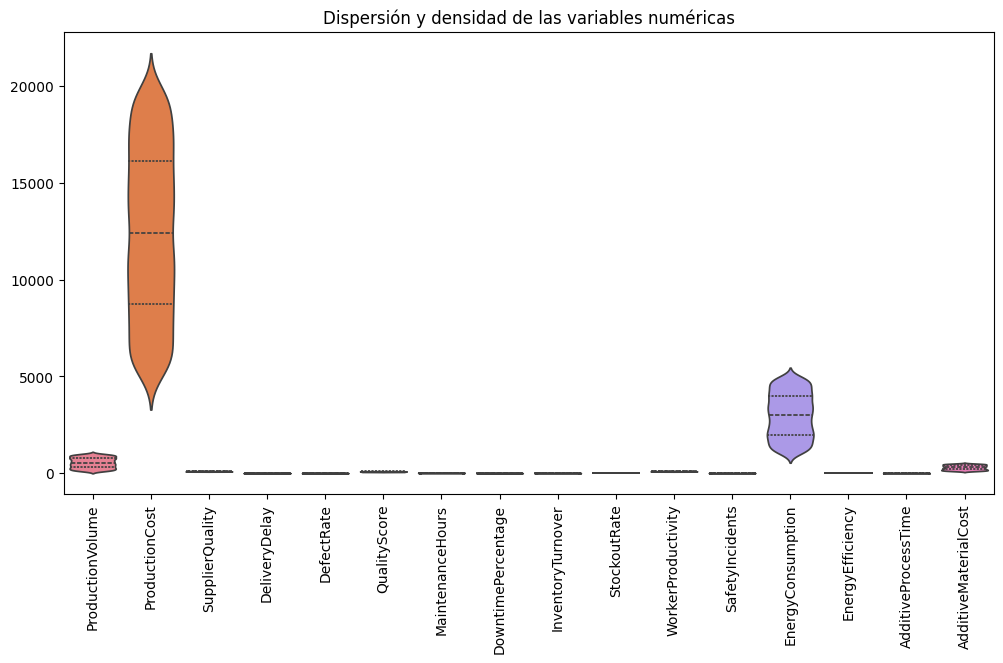

,count,mean,std,min,25%,50%,75%,max
ProductionVolume,3240.0,548.523148,262.402073,100.000000,322.000000,549.000000,775.250000,999.000000
ProductionCost,3240.0,12423.018476,4308.051904,5000.174521,8728.829280,12405.204656,16124.462428,19993.365549
SupplierQuality,3240.0,89.833290,5.759143,80.004820,84.869219,89.704861,94.789936,99.989214
DeliveryDelay,3240.0,2.558951,1.705804,0.000000,1.000000,3.000000,4.000000,5.000000
DefectRate,3240.0,2.749116,1.310154,0.500710,1.598033,2.708775,3.904533,4.998529
QualityScore,3240.0,80.134272,11.611750,60.010098,70.103420,80.265312,90.353822,99.996993
MaintenanceHours,3240.0,11.476543,6.872684,0.000000,5.750000,12.000000,17.000000,23.000000
DowntimePercentage,3240.0,2.501373,1.443684,0.001665,1.264597,2.465151,3.774861,4.997591
InventoryTurnover,3240.0,6.019662,2.329791,2.001611,3.983249,6.022389,8.050222,9.998577
StockoutRate,3240.0,0.050878,0.028797,0.000002,0.026200,0.051837,0.075473,0.099997


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

#Grafica de violin
plt.figure(figsize=(12,6))
sns.violinplot(data=df.drop(columns=["DefectStatus"]), inner="quartile")
plt.xticks(rotation=90)
plt.title("Dispersión y densidad de las variables numéricas")
plt.show()
df.describe().T


### Dispersion de las variables

La variabilidad de las variables numericas se analizo mediante graficas de violin:  
- ProductionCost y EnergyConsumption muestran mayor dispersion, con rangos amplios y distribuciones extendidas hacia valores altos  
- Variables como de productividad o calidad como SupplierQuality, WorkerProductivity y QualityScore tienen distribuciones concentradas en valores altos, reflejando baja variabilidad  
- DeliveryDelay, StockoutRate y SafetyIncidents presentan rangos muy reducidos, con la mayoria de valores cercanos al minimo  
- En conjunto, los resultados muestran que costos y consumo de energia son variables con mas dispersion, mientras que calidad y productividad son consistentes y estables


## 4. Como se relacionan las variables entre productos defectuosos y no defectuosos?

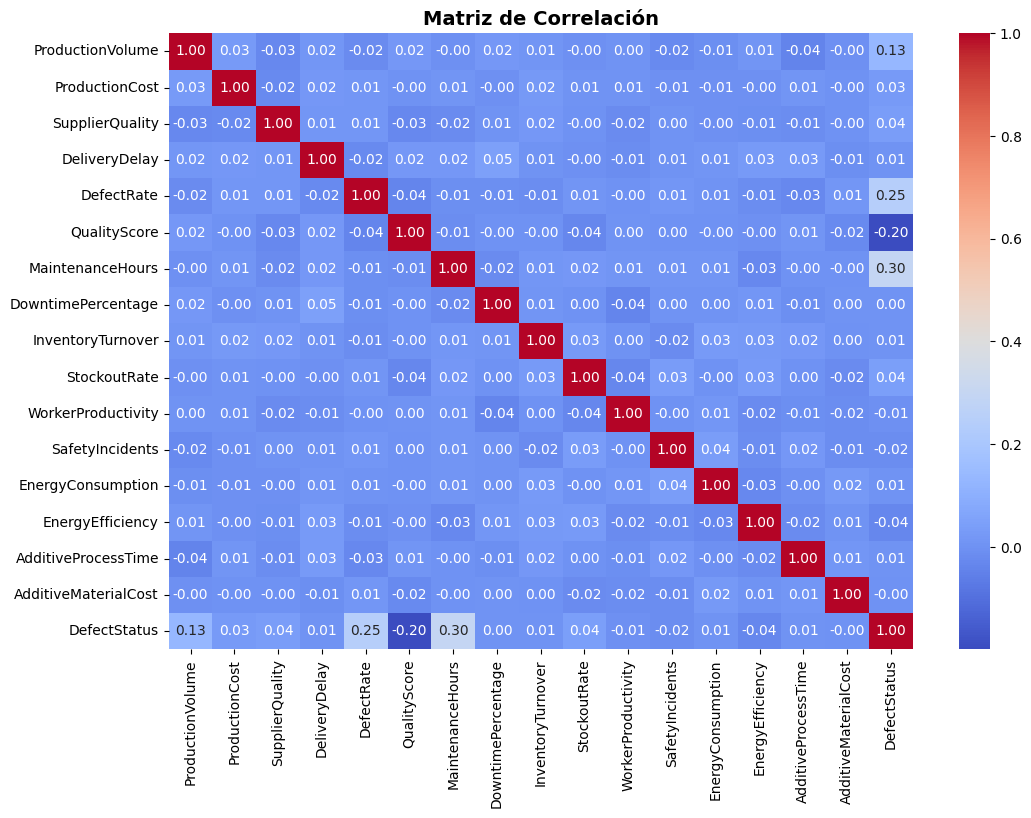

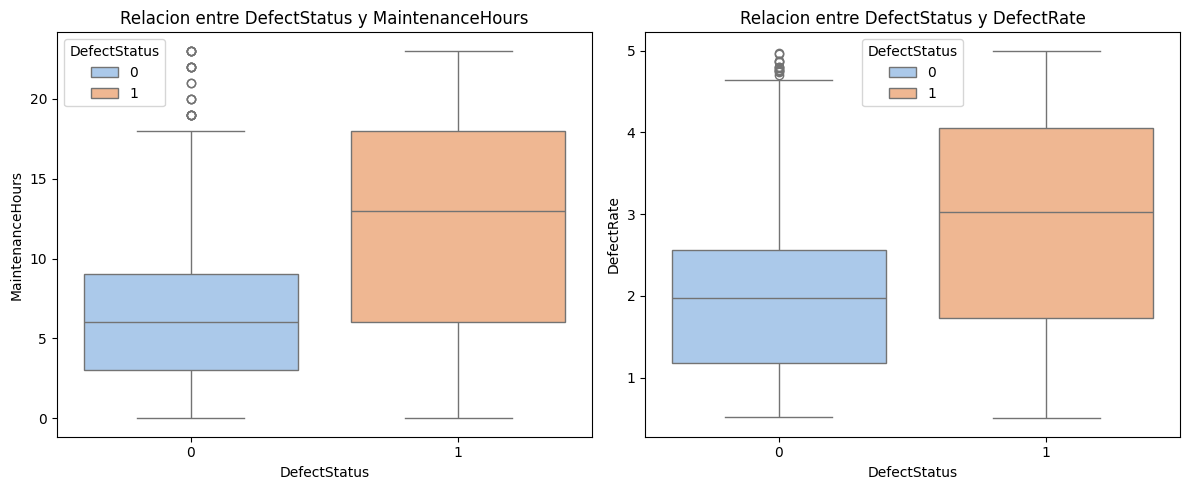

In [26]:
#Heatmap para correlacion entre variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación",fontsize=14,fontweight='bold')
plt.show()

#Relacion entre variables con correlacion mas alta
fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 fila, 2 columnas

#MaintenanceHours
sns.boxplot(x="DefectStatus", y="MaintenanceHours", data=df, hue="DefectStatus", palette="pastel", ax=axes[0])
axes[0].set_title("Relacion entre DefectStatus y MaintenanceHours")
axes[0].set_xlabel("DefectStatus")
axes[0].set_ylabel("MaintenanceHours")

#DefectRate
sns.boxplot(x="DefectStatus", y="DefectRate", data=df, hue="DefectStatus", palette="pastel", ax=axes[1])
axes[1].set_title("Relacion entre DefectStatus y DefectRate")
axes[1].set_xlabel("DefectStatus")
axes[1].set_ylabel("DefectRate")

plt.tight_layout()
plt.show()


## Relacion entre variables:

* El heatmap de correlacion muestra la relacion lineal entre las variables numericas, con valores que van de -1 a 1:

* La mayoria presentan correlaciones debiles entre si, lo que indica que aportan informacion tal vez independiente.

* MaintenanceHours y DefectRate muestran una correlacion relativamente debil pero mas alta que las demas. Al compararlas con DefectStatus se observa un patron: los lotes defectuosos tienden a tener mas horas de mantenimiento y tasas de defectos mas altas.

## 5. Existen valores atipicos en variables numericas?

Visualizacion de Outliers


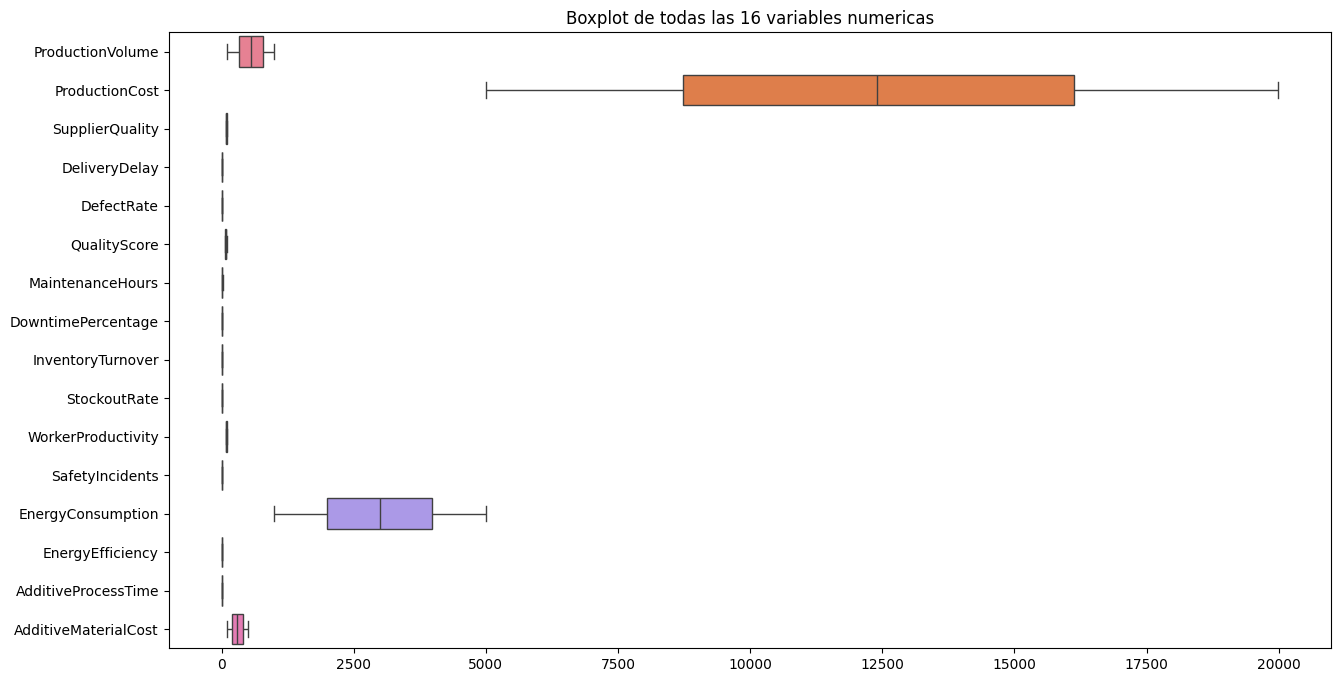

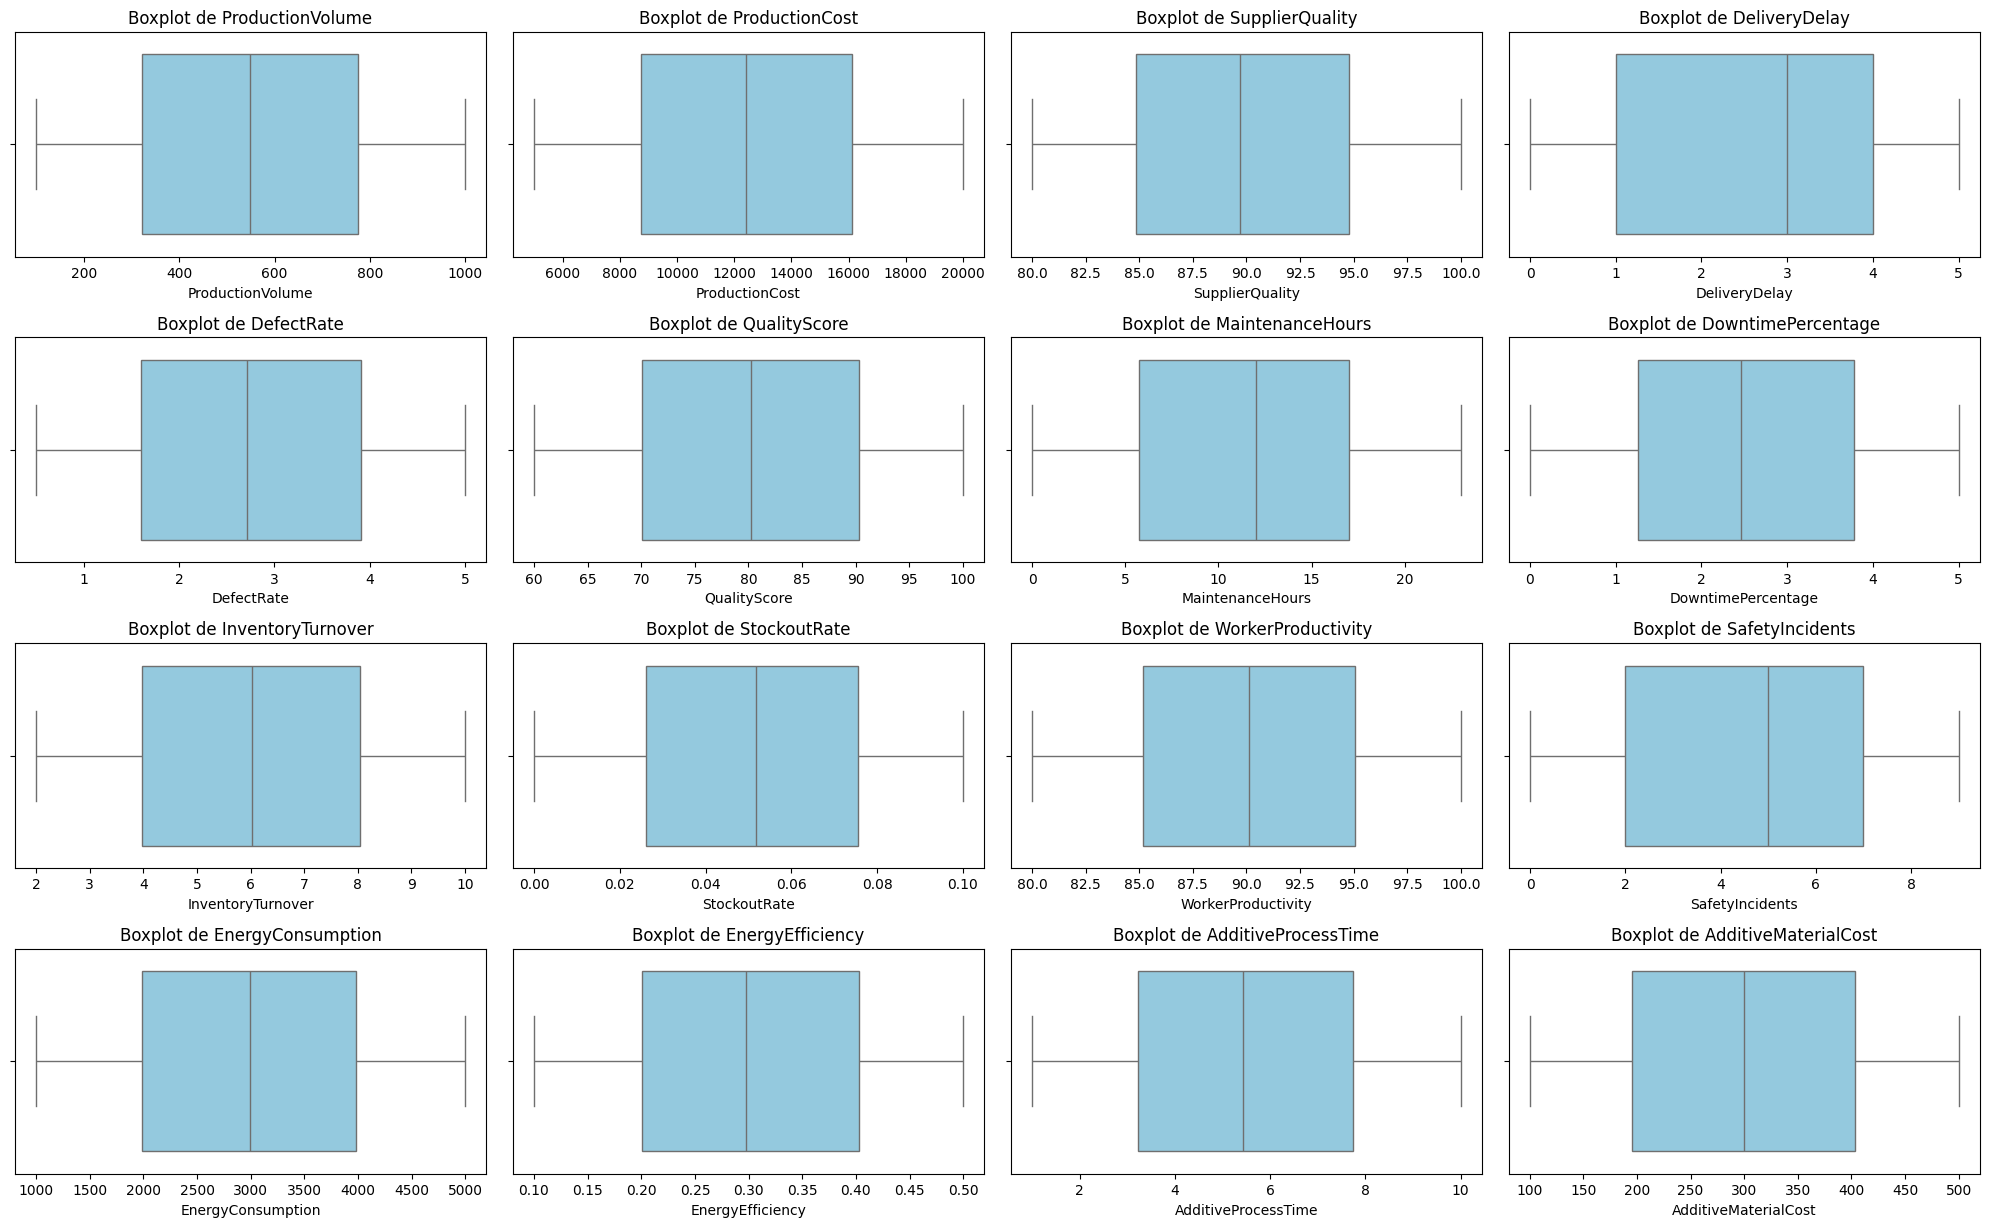

Verificacion de Outliers: 
ProductionVolume: 0 outliers
Verificacion de Outliers: 
ProductionCost: 0 outliers
Verificacion de Outliers: 
SupplierQuality: 0 outliers
Verificacion de Outliers: 
DeliveryDelay: 0 outliers
Verificacion de Outliers: 
DefectRate: 0 outliers
Verificacion de Outliers: 
QualityScore: 0 outliers
Verificacion de Outliers: 
MaintenanceHours: 0 outliers
Verificacion de Outliers: 
DowntimePercentage: 0 outliers
Verificacion de Outliers: 
InventoryTurnover: 0 outliers
Verificacion de Outliers: 
StockoutRate: 0 outliers
Verificacion de Outliers: 
WorkerProductivity: 0 outliers
Verificacion de Outliers: 
SafetyIncidents: 0 outliers
Verificacion de Outliers: 
EnergyConsumption: 0 outliers
Verificacion de Outliers: 
EnergyEfficiency: 0 outliers
Verificacion de Outliers: 
AdditiveProcessTime: 0 outliers
Verificacion de Outliers: 
AdditiveMaterialCost: 0 outliers


In [27]:
#Revision de outliers
columnas_numericas = df.drop(columns=['DefectStatus']).select_dtypes(include=['int64','float64']).columns

#Boxplot de todas las columnas numericas
print("Visualizacion de Outliers")
plt.figure(figsize=(15,8))
sns.boxplot(data=df[columnas_numericas],orient="h")
plt.title('Boxplot de todas las 16 variables numericas')
plt.show()

#Seleccionar columnas solo numericas excepto DefecStatus
columnas_numericas = df.drop(columns=['DefectStatus']).columns

#Definir columnas y filas
n_cols = 4
n_rows = int(len(columnas_numericas) / n_cols) + 1

plt.figure(figsize=(20, 15))

for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

#Comprobacion de outliers en las variables numericas
for col in columnas_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col] # Filtrar los valores de la columna que son outliers (menores a Q1-1.5*IQR o mayores a Q3+1.5*IQR)
    print("Verificacion de Outliers: ")
    print(f"{col}: {len(outliers)} outliers")



### Conclusiones de los boxplots de outliers

**Identificacion visual**  
- ProductionCost y EnergyConsumption tienen los rangos mas amplios y valores extremos visuales
- Los boxplots de las 16 variables numericas no muestran puntos fuera de los bigotes  
- Esto indica que no existen valores extremos visibles que alteren la distribucion  

**Comprobacion con IQR**  
- Se aplico el metodo del rango intercuartilico (Q1, Q3, IQR) para verificar la presencia de outliers  
- En cada variable se calculo el numero de registros fuera del rango permitido (Q1 - 1.5*IQR, Q3 + 1.5*IQR)  
- El resultado mostro 0 outliers en todas las columnas numericas  

**Distribucion y variabilidad**  
- Las cajas de los boxplots reflejan dispersion moderada entre variables, pero sin valores atipicos aislados  
- Esto confirma que las variables estan limpias y no requieren tratamiento por outliers  

### Conclusion
El analisis con los boxplots e IQR podemos confirmar que las variables numericas no presentan outliers significativos.  
Por lo tanto, no es necesario eliminar, transformar o ajustar valores extremos antes de continuar con el modelado  


### 6. Distribuciones de las variables numericas, que forma tienen?

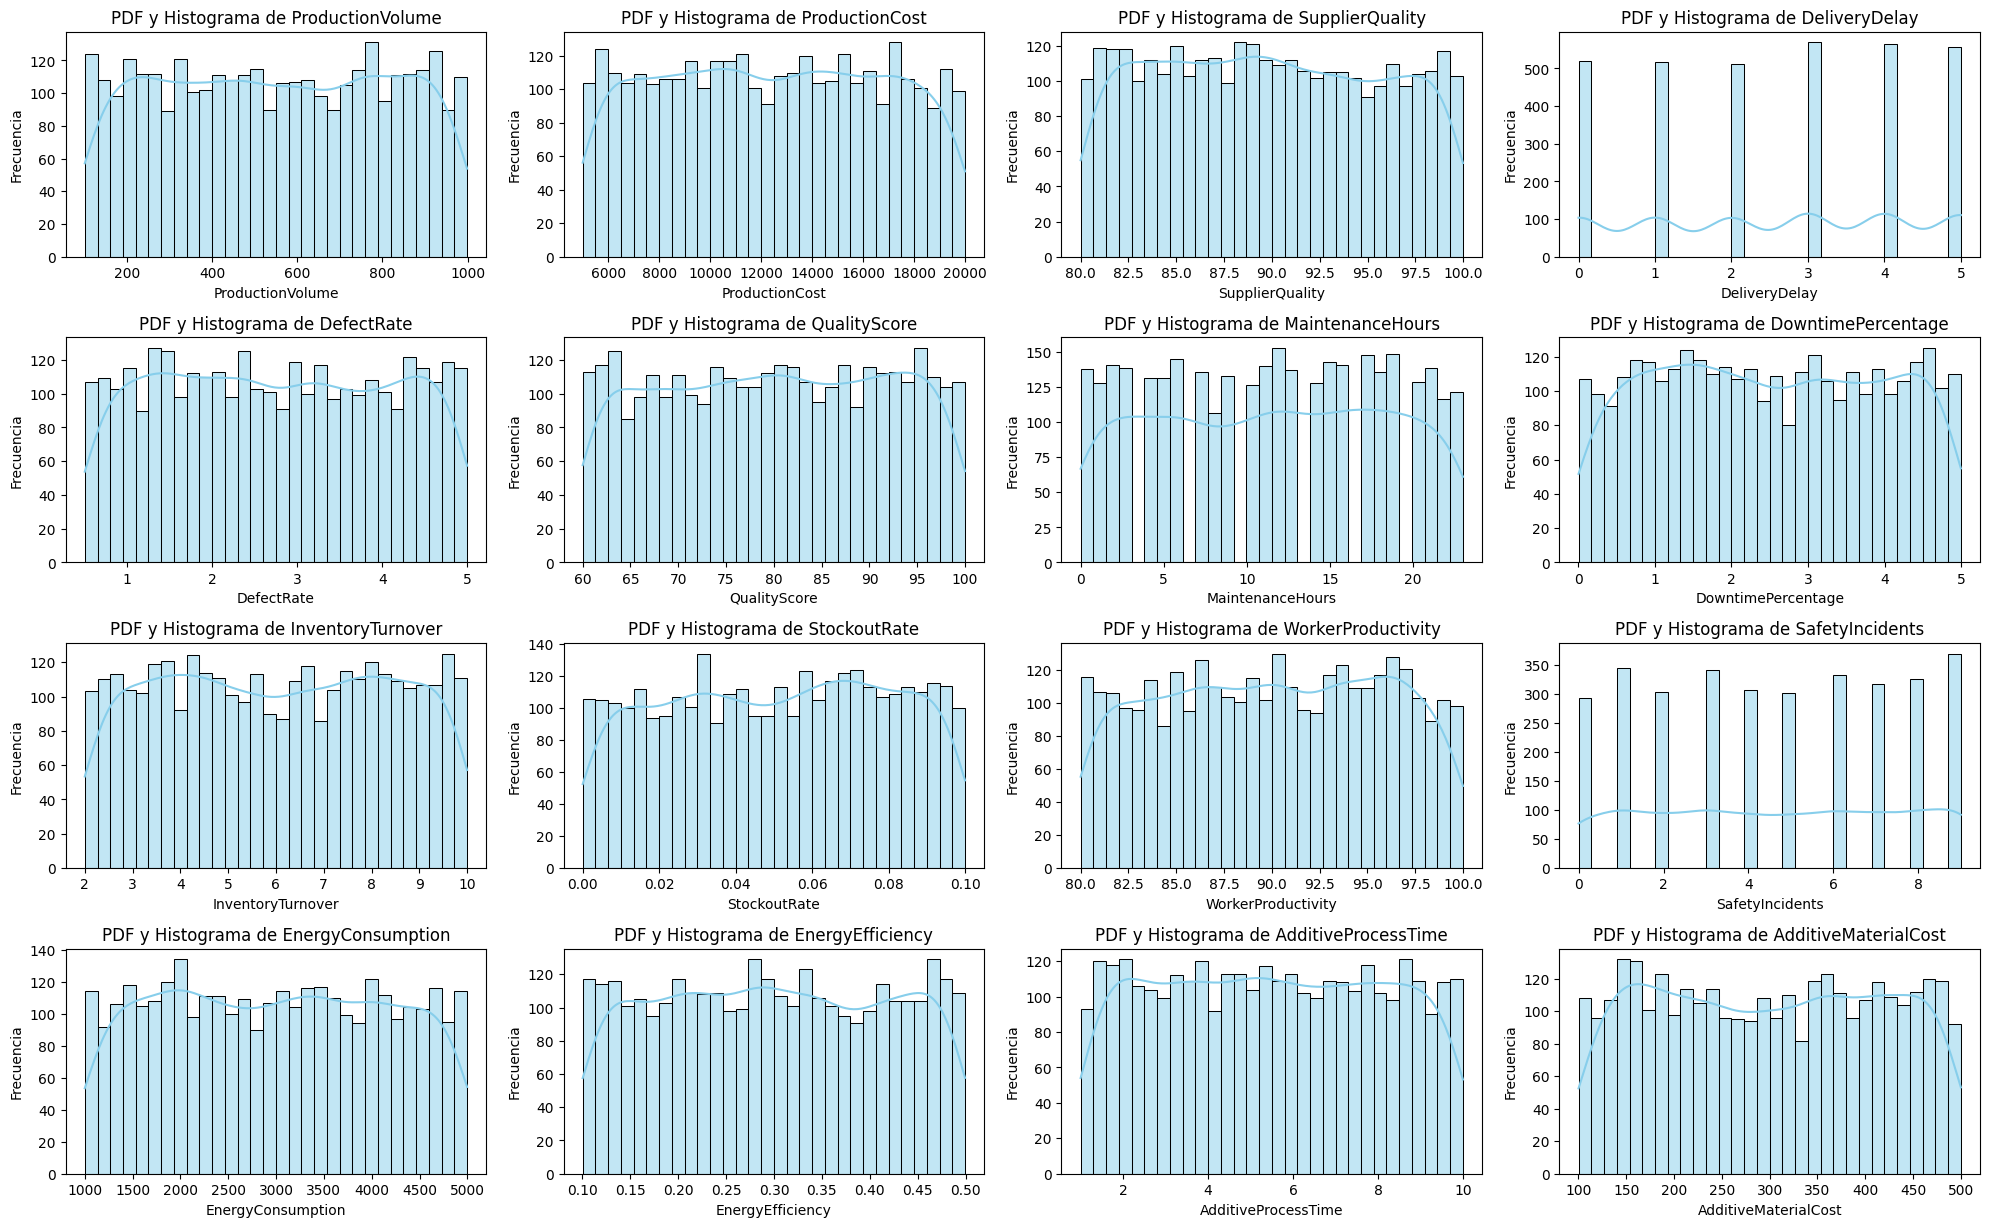

Asimetria de variables numericas:

ProductionVolume: -0.003 → aprox. simetrica
ProductionCost: 0.011 → aprox. simetrica
SupplierQuality: 0.051 → aprox. simetrica
DeliveryDelay: -0.059 → aprox. simetrica
DefectRate: 0.022 → aprox. simetrica
QualityScore: -0.030 → aprox. simetrica
MaintenanceHours: -0.022 → aprox. simetrica
DowntimePercentage: 0.021 → aprox. simetrica
InventoryTurnover: -0.000 → aprox. simetrica
StockoutRate: -0.052 → aprox. simetrica
WorkerProductivity: -0.034 → aprox. simetrica
SafetyIncidents: -0.014 → aprox. simetrica
EnergyConsumption: 0.018 → aprox. simetrica
EnergyEfficiency: 0.010 → aprox. simetrica
AdditiveProcessTime: 0.017 → aprox. simetrica
AdditiveMaterialCost: 0.006 → aprox. simetrica


In [28]:
#Distribucion de variables numericas

# Seleccionamos todas las columnas numericas excepto DefectStatus
columns = df.drop(columns=['DefectStatus']).columns

# Definir cantidad de filas y columnas para los subplots
n_cols = 4
n_rows = int(len(columns) / n_cols) + 1 # calcula el numero de filas dividiendo variables entre columnas y suma 1 por si sobran variables

plt.figure(figsize=(20, 15))

for i, col in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

# Calcular skewness para todas las variables numericas
skew_values = df.drop(columns=['DefectStatus']).skew()

# Mostrar resultados ordenados
print("Asimetria de variables numericas:\n")
for col, val in skew_values.items():
    if val > 0.5:
        interpretacion = "sesgada a la derecha (sesgo positivo)"
    elif val < -0.5:
        interpretacion = "sesgada a la izquierda (sesgo negativo)"
    else:
        interpretacion = "aprox. simetrica"
    print(f"{col}: {val:.3f} → {interpretacion}")


## Conclusion: Distribucion de las variables numericas>
* Las 16 variables numericas presentan distribuciones aproximadamente simetricas. El analisis de los histogramas mostro que no siguen una distribucion normal estricta (tienen mas forma rectangulares que de campana), pero tampoco presentan sesgos marcados hacia la derecha o la izquierda.

* El calculo de las asimetrias para cada variable arrojo valores muy cercanos a cero (entre -0.059 y 0.051), lo que confirma que no existen asimetrias significativas. En otras palabras, las variables son relativamente equilibradas en su forma y no requieren correcciones por sesgo.

* Conclusion: las variables numericas presentan distribuciones aproximadamente simetricas. Aunque no siguen una distribucion normal estricta, no muestran sesgos positivos ni negativos relevantes.

### 7. Pruebas de normalizacion, las variables numericas tienen distribucion normal?


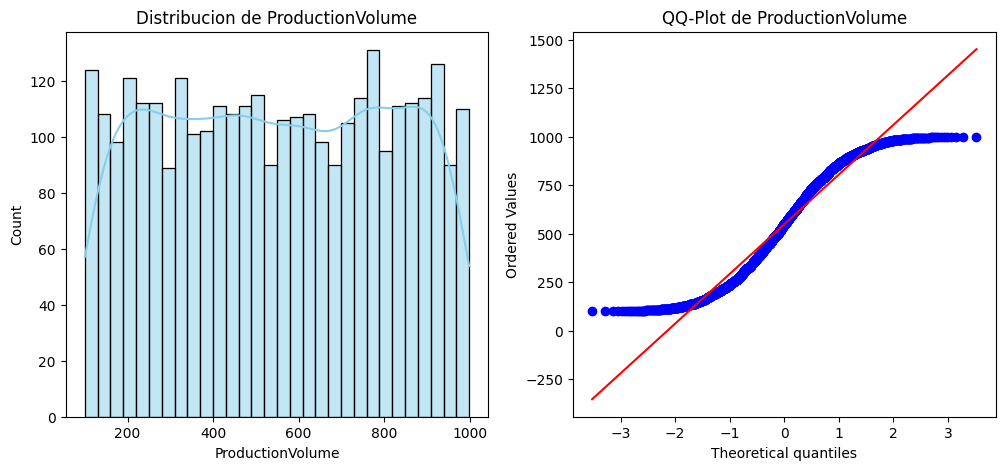

Prueba de normalidad para la variable ProductionVolume:
Shapiro-Wilk p-value: 0.00000
Kolmogorov-Smirnov p-value: 0.00000
Anderson-Darling Test: Estadistico = 39.39862
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson p-value: 0.00000


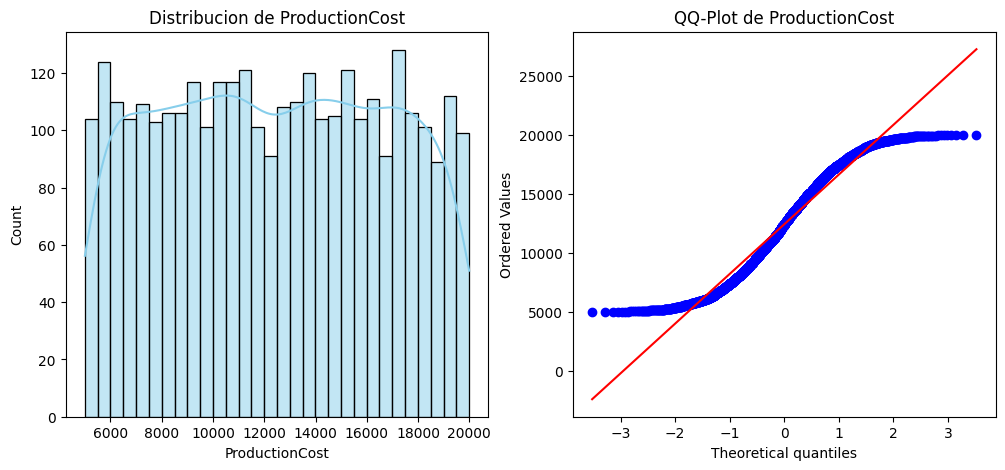

Prueba de normalidad para la variable ProductionCost:
Shapiro-Wilk p-value: 0.00000
Kolmogorov-Smirnov p-value: 0.00000
Anderson-Darling Test: Estadistico = 34.71673
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson p-value: 0.00000


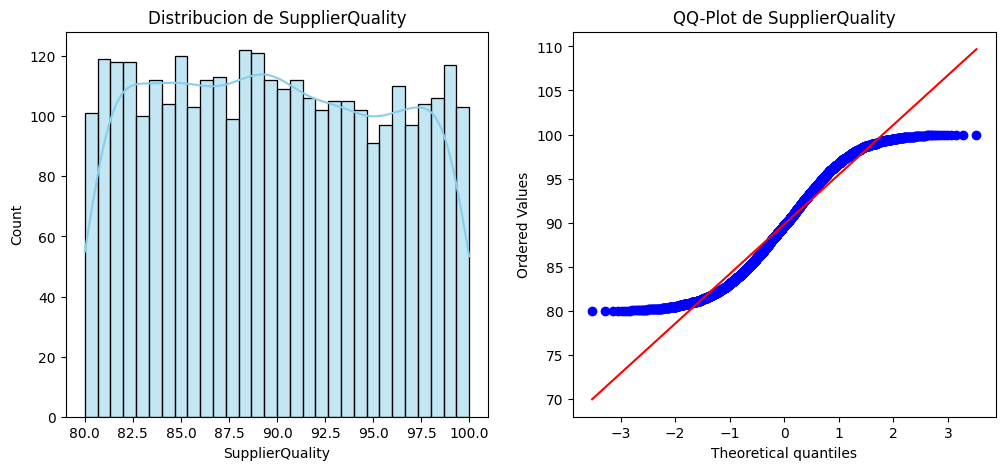

Prueba de normalidad para la variable SupplierQuality:
Shapiro-Wilk p-value: 0.00000
Kolmogorov-Smirnov p-value: 0.00000
Anderson-Darling Test: Estadistico = 35.24252
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson p-value: 0.00000


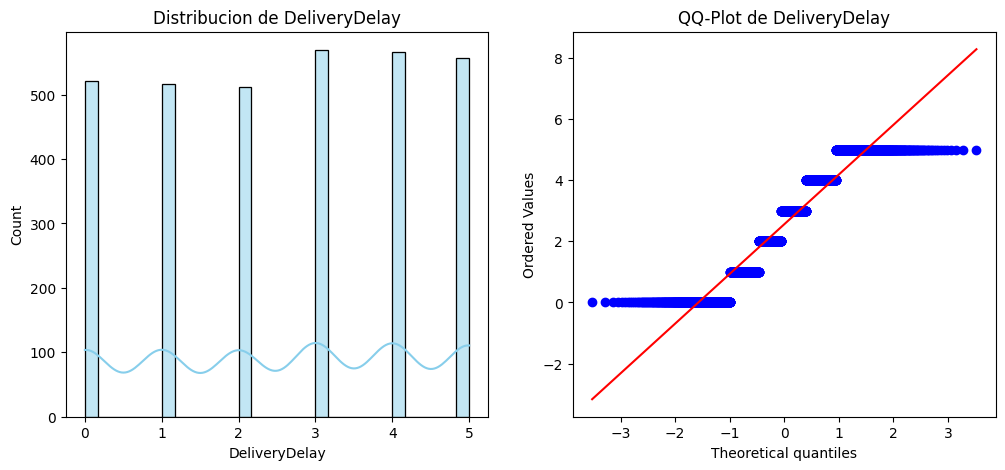

Prueba de normalidad para la variable DeliveryDelay:
Shapiro-Wilk p-value: 0.00000
Kolmogorov-Smirnov p-value: 0.00000
Anderson-Darling Test: Estadistico = 91.76299
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson p-value: 0.00000


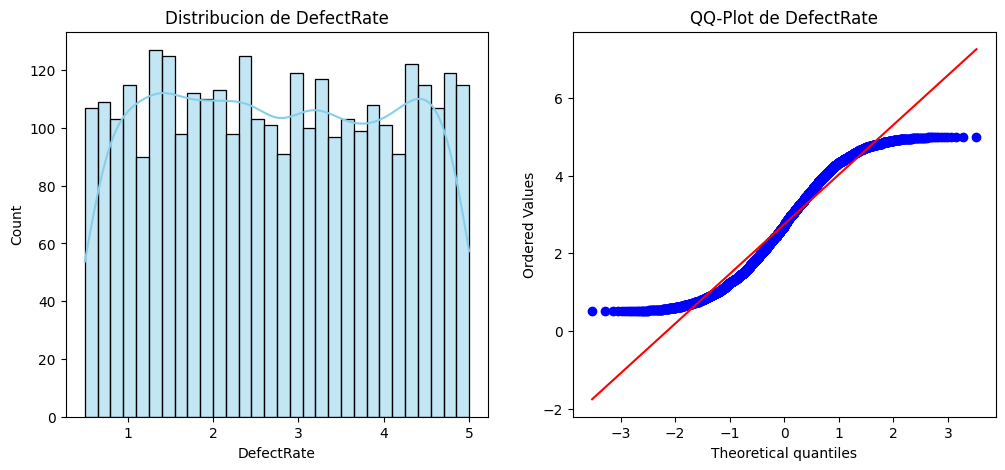

Prueba de normalidad para la variable DefectRate:
Shapiro-Wilk p-value: 0.00000
Kolmogorov-Smirnov p-value: 0.00000
Anderson-Darling Test: Estadistico = 38.79311
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson p-value: 0.00000


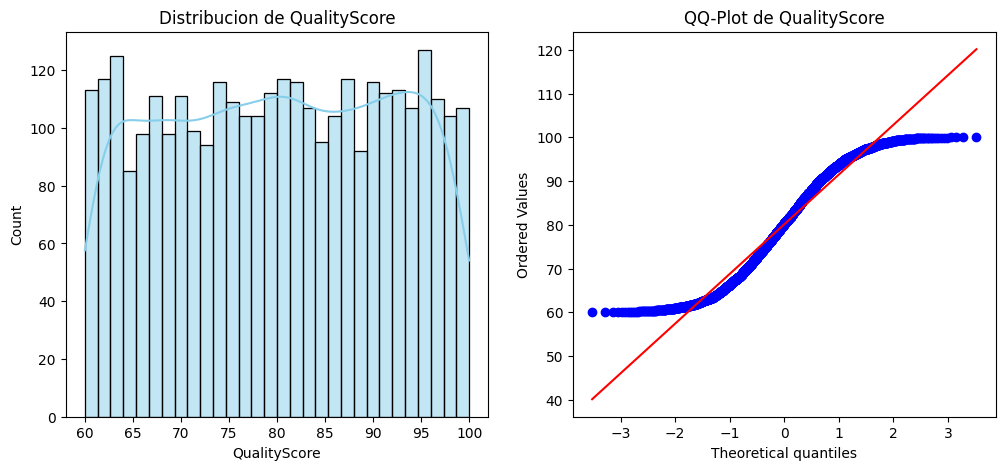

Prueba de normalidad para la variable QualityScore:
Shapiro-Wilk p-value: 0.00000
Kolmogorov-Smirnov p-value: 0.00000
Anderson-Darling Test: Estadistico = 36.62059
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson p-value: 0.00000


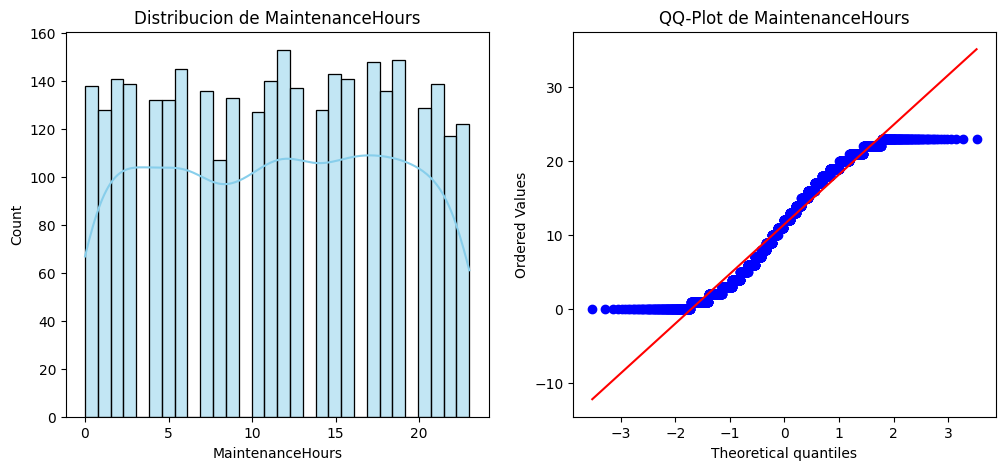

Prueba de normalidad para la variable MaintenanceHours:
Shapiro-Wilk p-value: 0.00000
Kolmogorov-Smirnov p-value: 0.00000
Anderson-Darling Test: Estadistico = 39.34148
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson p-value: 0.00000


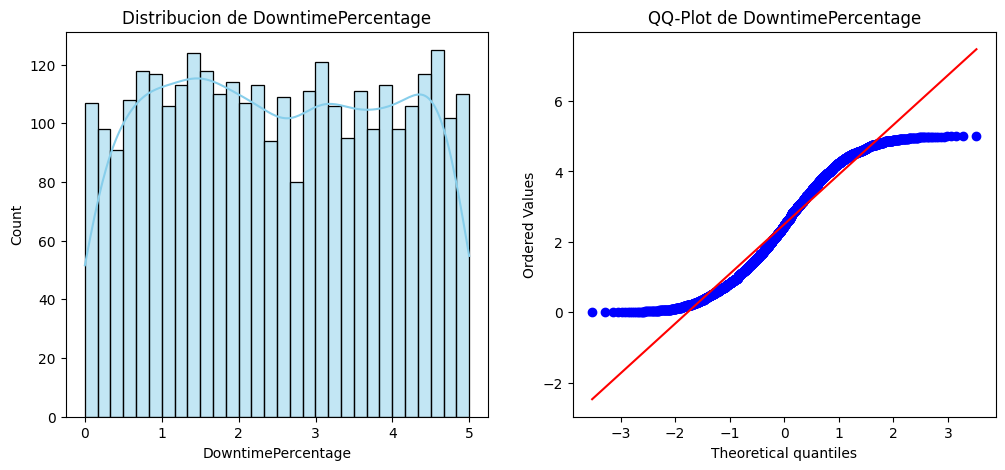

Prueba de normalidad para la variable DowntimePercentage:
Shapiro-Wilk p-value: 0.00000
Kolmogorov-Smirnov p-value: 0.00000
Anderson-Darling Test: Estadistico = 37.88875
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson p-value: 0.00000


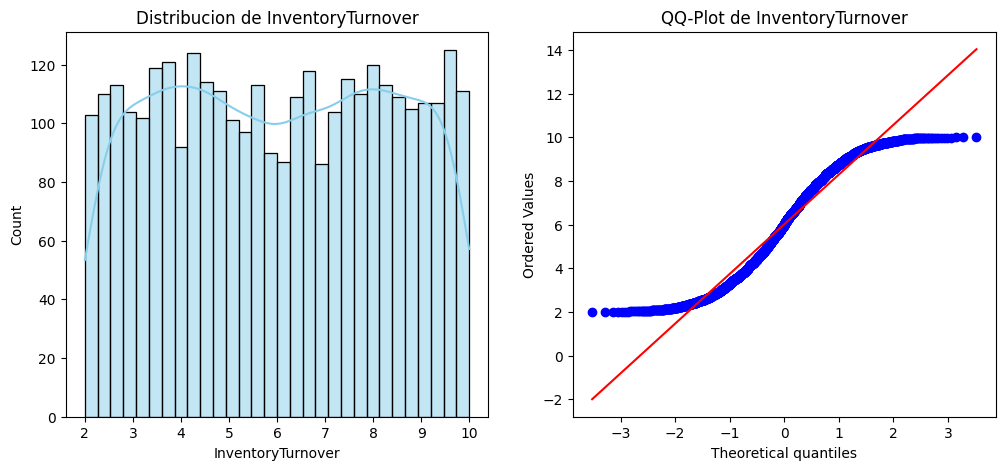

Prueba de normalidad para la variable InventoryTurnover:
Shapiro-Wilk p-value: 0.00000
Kolmogorov-Smirnov p-value: 0.00000
Anderson-Darling Test: Estadistico = 40.44158
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson p-value: 0.00000


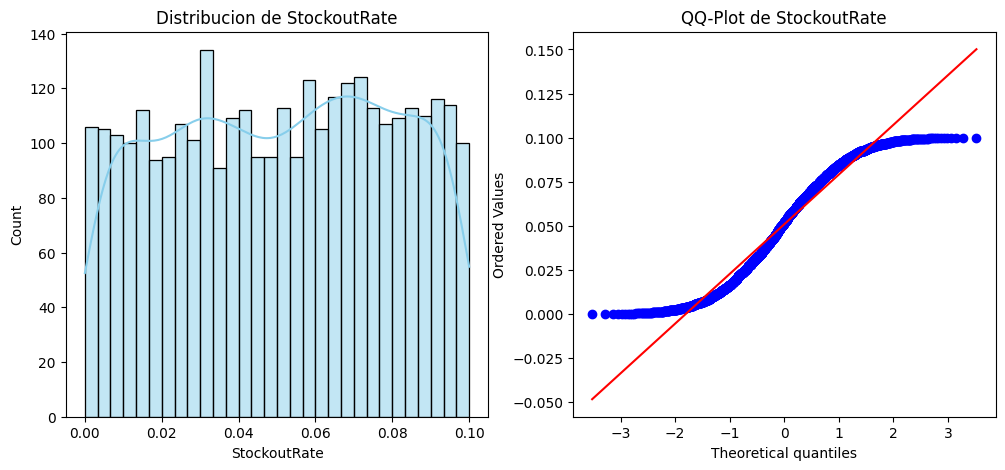

Prueba de normalidad para la variable StockoutRate:
Shapiro-Wilk p-value: 0.00000
Kolmogorov-Smirnov p-value: 0.00000
Anderson-Darling Test: Estadistico = 36.38592
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson p-value: 0.00000


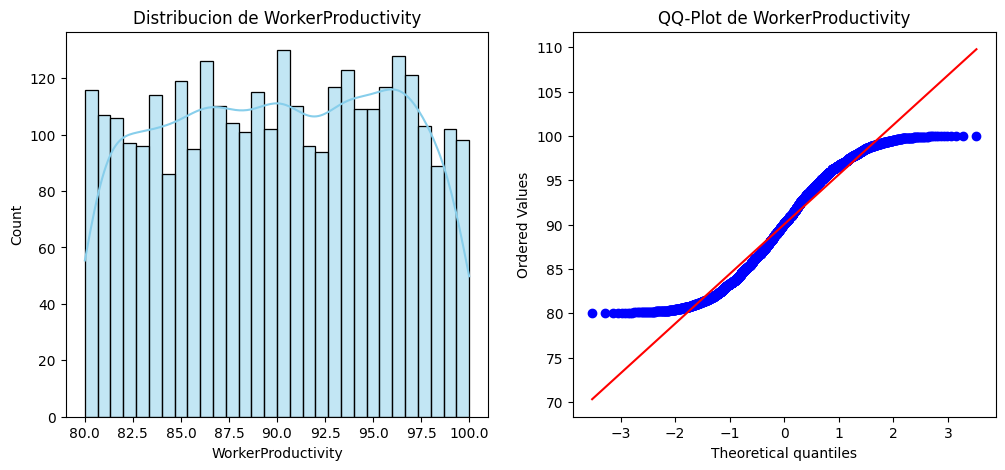

Prueba de normalidad para la variable WorkerProductivity:
Shapiro-Wilk p-value: 0.00000
Kolmogorov-Smirnov p-value: 0.00000
Anderson-Darling Test: Estadistico = 34.35132
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson p-value: 0.00000


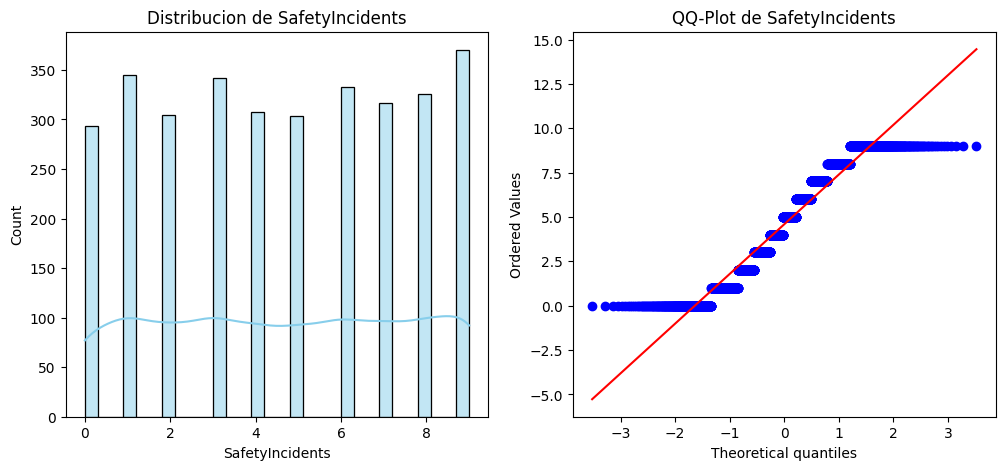

Prueba de normalidad para la variable SafetyIncidents:
Shapiro-Wilk p-value: 0.00000
Kolmogorov-Smirnov p-value: 0.00000
Anderson-Darling Test: Estadistico = 59.24694
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson p-value: 0.00000


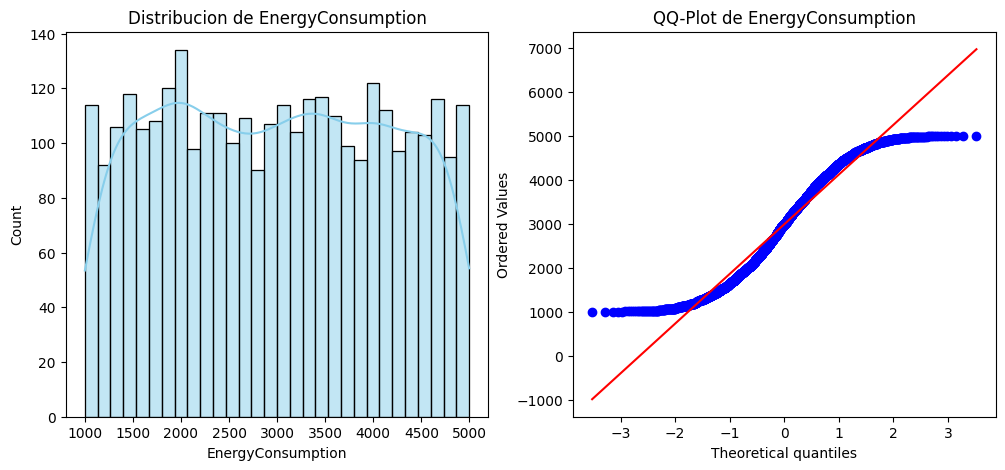

Prueba de normalidad para la variable EnergyConsumption:
Shapiro-Wilk p-value: 0.00000
Kolmogorov-Smirnov p-value: 0.00000
Anderson-Darling Test: Estadistico = 36.16500
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson p-value: 0.00000


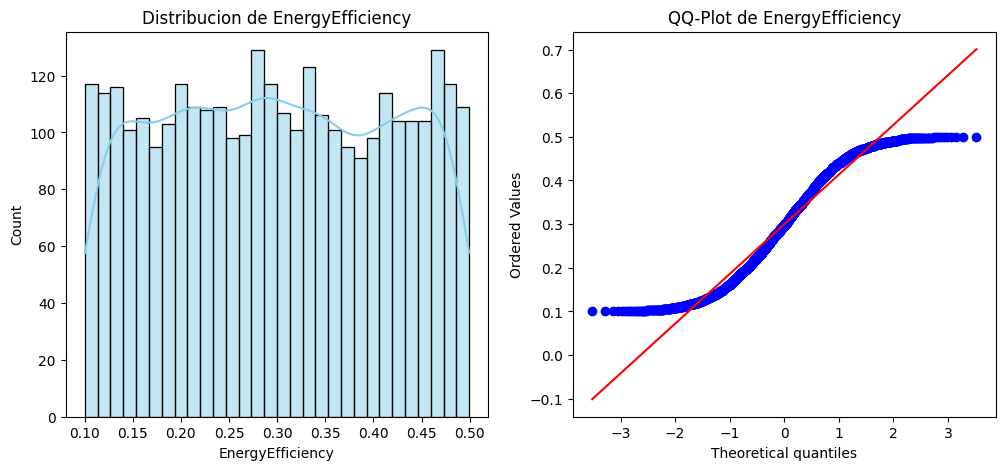

Prueba de normalidad para la variable EnergyEfficiency:
Shapiro-Wilk p-value: 0.00000
Kolmogorov-Smirnov p-value: 0.00000
Anderson-Darling Test: Estadistico = 36.03328
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson p-value: 0.00000


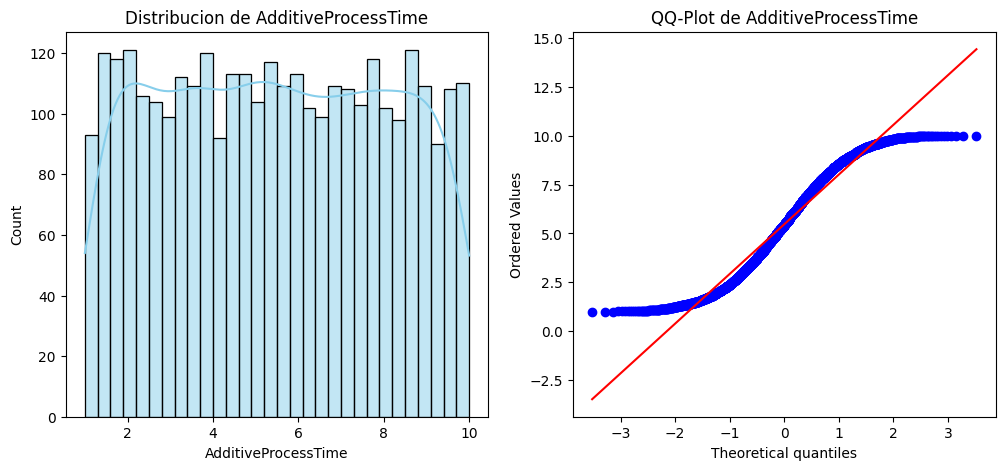

Prueba de normalidad para la variable AdditiveProcessTime:
Shapiro-Wilk p-value: 0.00000
Kolmogorov-Smirnov p-value: 0.00000
Anderson-Darling Test: Estadistico = 36.27532
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson p-value: 0.00000


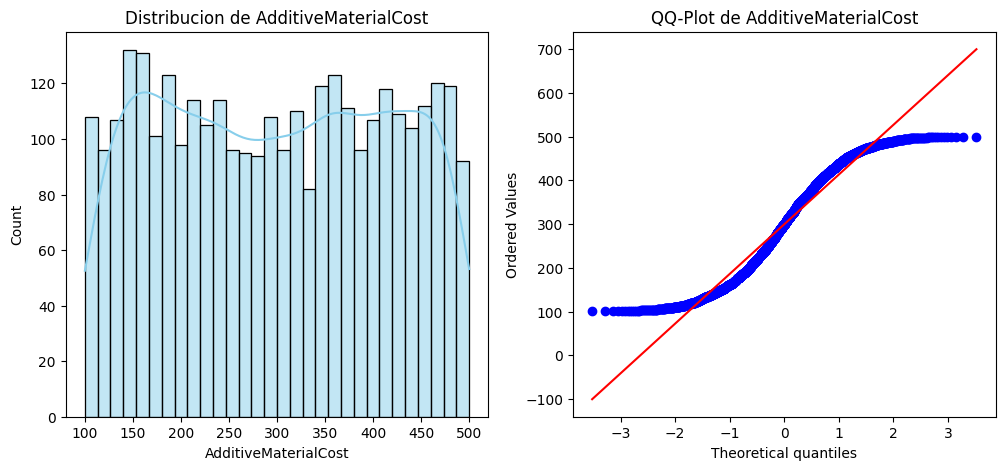

Prueba de normalidad para la variable AdditiveMaterialCost:
Shapiro-Wilk p-value: 0.00000
Kolmogorov-Smirnov p-value: 0.00000
Anderson-Darling Test: Estadistico = 42.84230
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson p-value: 0.00000


In [29]:
#Verificacion de normalidad en las variables
import scipy.stats as stats

def prueba_normalidad(data,col):
    print(f"Prueba de normalidad para la variable {col}:")

    #Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))
    print(f'Shapiro-Wilk p-value: {shapiro_test.pvalue:.5f}')

    #Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f'Kolmogorov-Smirnov p-value: {ks_test.pvalue:.5f}')

    # Anderson-Darling
    ad_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadistico = {ad_test.statistic:.5f}")
    for i in range(len(ad_test.critical_values)):
        sl, cv = ad_test.significance_level[i], ad_test.critical_values[i]
    if ad_test.statistic < cv:
        print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
    else:
        print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")


    #D'Agostino-Pearson
    dagostino_test = stats.normaltest(data)
    print(f'D\'Agostino-Pearson p-value: {dagostino_test.pvalue:.5f}')

#Funcion para graficar histograma y QQplot
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=30, kde=True, color="skyblue")
    plt.title(f"Distribucion de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()


# Aplicar pruebas y graficos a cada columna numerica
for column in columnas_numericas:
    data = df[column]
    plot_distribution(data, column)
    prueba_normalidad(data, column)

## Conclusiones del analisis de normalidad:

Se aplicaron pruebas de normalidad (Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling y D’Agostino-Pearson) junto con graficos de histograma y QQ-Plot.

 * Los resultados muestran que las variables numericas no cumplen con el supuesto de normalidad estadistica.
 * Los histogramas tienen formas que en algunos casos son simetricas, pero no se ajustan a la campana de la distribucion normal.
 * En los QQ-Plot se observa que los puntos se desvían de la linea diagonal, especialmente en los extremos, lo que confirma desviaciones respecto a la normalidad.

**Observaciones por grupos de variables:**

 * DefectRate, StockoutRate y MaintenanceHours presentan distribuciones asimetricas, alejadas del patron normal.
 * ProductionCost y QualityScore se ven mas balanceadas, aunque tampoco cumplen los criterios de normalidad.
 * En general, todas las variables presentan desviaciones que descartan un ajuste perfecto a la distribucion gaussiana.

**Conclusion:** Las pruebas y graficos evidencian que las variables numericas tienen distribuciones que no cumplen con el criterio de normalidad. Esto sugiere usar metodos estadisticos robustos o no parametricos, o aplicar transformaciones (log, Box-Cox) cuando sea necesario.

## 6) Preprocesamiento de los datos

In [30]:
# Conversión de tipo de dato para la variable objetivo
df["DefectStatus"] = df["DefectStatus"].astype("category")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ProductionVolume      3240 non-null   int64   
 1   ProductionCost        3240 non-null   float64 
 2   SupplierQuality       3240 non-null   float64 
 3   DeliveryDelay         3240 non-null   int64   
 4   DefectRate            3240 non-null   float64 
 5   QualityScore          3240 non-null   float64 
 6   MaintenanceHours      3240 non-null   int64   
 7   DowntimePercentage    3240 non-null   float64 
 8   InventoryTurnover     3240 non-null   float64 
 9   StockoutRate          3240 non-null   float64 
 10  WorkerProductivity    3240 non-null   float64 
 11  SafetyIncidents       3240 non-null   int64   
 12  EnergyConsumption     3240 non-null   float64 
 13  EnergyEfficiency      3240 non-null   float64 
 14  AdditiveProcessTime   3240 non-null   float64 
 15  Addi

## **Conclusion sobre Preprocesamiento de los datos**

* No fue necesario imputar valores faltantes porque el dataset no tiene nulos  
* No se detectaron filas duplicadas, por lo que no fue necesario eliminarlas
* Aunque se identificaron valores extremos en las variables de costos y energia, las pruebas con IQR confirmaron que no son outliers mal registrados, por lo que se conservaron con el dataset original.
* La variable DefectStatus se convirtio a tipo categorico para reflejar su naturaleza binaria, lo que nos permite que sea tratada como una etiqueta (defecto bajo=0) o (defecto alto=1).



## 7) Conclusiones parciales

- La calidad de los datos es adecuada: no se encontraron valores nulos ni registros duplicados, y los tipos de datos son correctos  
- Las revisiones de exactitud confirmaron que no existen valores fuera de rango en variables porcentuales ni negativos en costos o conteos. La variable categorica DefectStatus contiene unicamente valores validos (0 y 1)  
- Se identifico que las variables estan en diferentes escalas, lo que no afecta el analisis descriptivo pero requerira transformaciones numericas en fases posteriores  
- El analisis descriptivo mostro que la variable objetivo DefectStatus esta desbalanceada (84 % defecto alto = 1 y 16 % defecto bajo = 0)  
- Se detectaron valores extremos en variables numericas, pero corresponden a la variabilidad natural del proceso de manufactura y no son errores de calidad
- Las 16 variables numericas presentan distribuciones aproximadamente simetricas. Aunque no siguen una distribucion normal estricta, no muestran sesgos significativos hacia la derecha o izquierda. Esto significa que las medidas de tendencia central son representativas y confiables para describir cada variable  
- Las pruebas de normalidad (Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling y D’Agostino-Pearson) confirmaron que las variables no cumplen con el criterio de normalidad estadistica   
- En general, el dataset esta listo para continuar con el analisis exploratorio y fases posteriores de modelado

## 8) Escalado y Normalizacion de las Variables Numericas.

Datos dspues de la normalizacion y escalacion:
   ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
0          0.113459        0.545263         0.332445            0.2   
1          0.483871        0.985105         0.315538            0.8   
2          0.956618        0.937802         0.106466            0.0   
3          0.300334        0.043182         0.366844            1.0   
4          0.117909        0.164878         0.099331            0.6   

   DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
0    0.582678      0.086363          0.391304            0.010144   
1    0.070883      0.592387          0.869565            0.982133   
2    0.892387      0.758760          0.043478            0.493053   
3    0.030640      0.190527          0.347826            0.938927   
4    0.748601      0.568142          0.391304            0.549460   

   InventoryTurnover  StockoutRate  WorkerProductivity  SafetyIncidents  \
0           0.828927      0.813234  

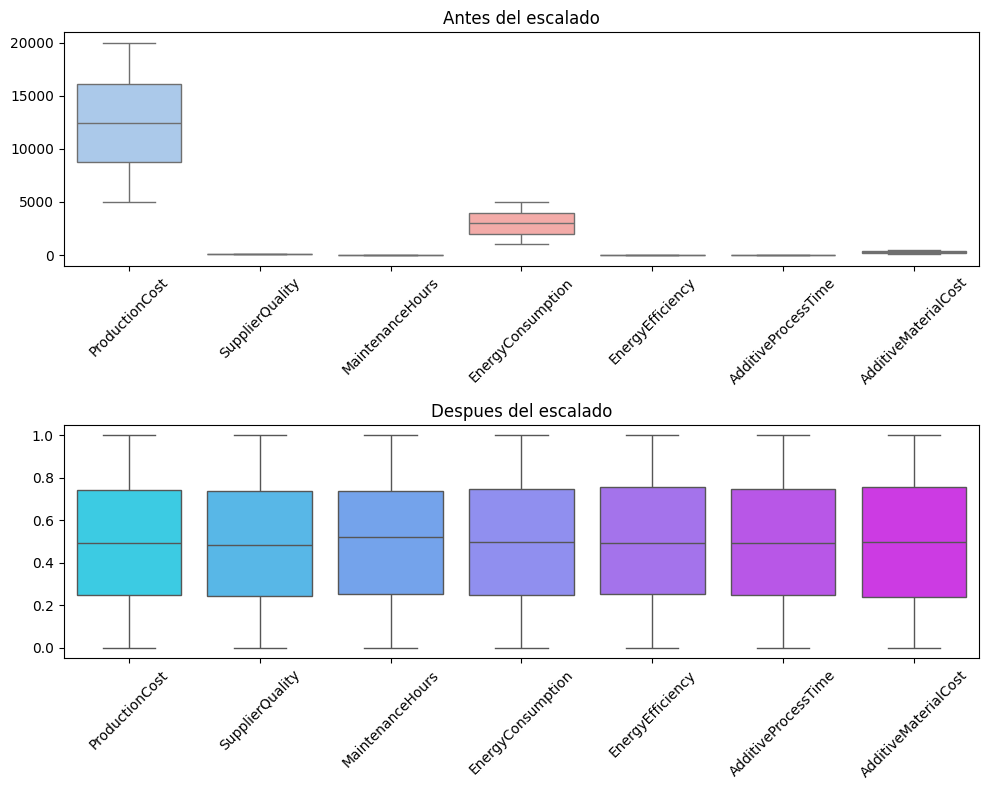

In [31]:
from sklearn.preprocessing import MinMaxScaler

#Separar las variables predictoras con la variable objetivo
X = df.drop(columns=['DefectStatus'])
y = df['DefectStatus']

#Crear el escalador Min-Max para transformar las variables al rango [0,1]
scaler = MinMaxScaler()

#Aplicar el escalador a las variables predictoras
X_scaled = scaler.fit_transform(X)

#Convertir nuevamente a DataFrame conservando los nombres de las columnas
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['DefectStatus'] = y

#Mostrar el DataFrame escalado
print("Datos dspues de la normalizacion y escalacion:")
print(df_scaled.head())

# Comparación visual antes y después del escalado
variables_grafica = ['ProductionCost','SupplierQuality', 'MaintenanceHours', 'EnergyConsumption', 'EnergyEfficiency', 'AdditiveProcessTime', 'AdditiveMaterialCost']

fig, axes = plt.subplots(2, 1, figsize=(10,8))
sns.boxplot(data=df[variables_grafica], ax=axes[0], palette='pastel')
axes[0].set_title('Antes del escalado')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df_scaled[variables_grafica], ax=axes[1], palette='cool')
axes[1].set_title('Despues del escalado')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## **Conclusion sobre Escalado y Normalizacion de las Variables Numericas.**

* El proceso de escalado permitio homogenizar las magnitudes de las variables numericas del dataset que representan rangos muy diferentes (por ejemplo costos, en miles, porcentajes, y horas)

* Se uso el metodo Min-Max para llevar todos los valores al rango de 0 a 1 sin cambiar la forma de los datos.Esto ayuda a que ningun atributo tenga mas peso que otro cuando se usen modelos que dependen de distancias.

* En resumen, el escalado deja los datos mas consistentes y listos para seguir con el modelado (dependiendo del modelo que mejor funcione aqui).

## 9) Clasificador a Distancia (KNN)
 **9.1 Espacio de Caracteristicas**

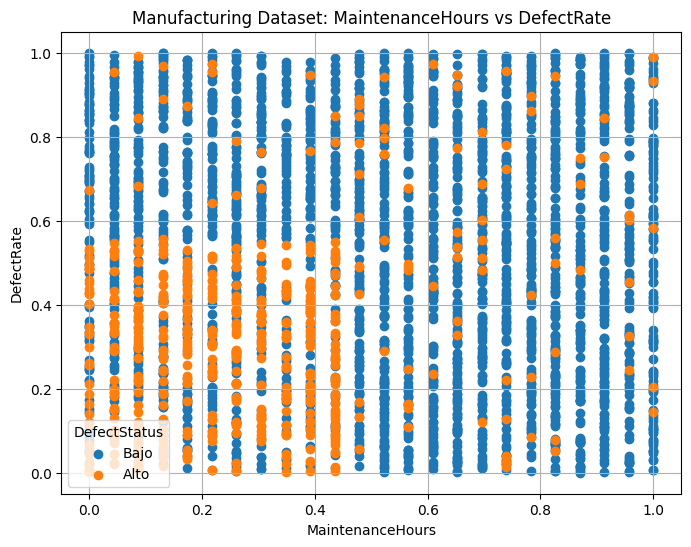

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Representacion del espacio caracteristico
# Variables elegidas por correlacion
x1_attr = 'MaintenanceHours'
x2_attr = 'DefectRate'

plt.figure(figsize=(8,6))
for status in df_scaled['DefectStatus'].unique():  # Repite 2 veces (0 y 1)
    subset = df_scaled[df_scaled['DefectStatus'] == status]
    plt.scatter(subset[x1_attr], subset[x2_attr], label=f'DefectStatus {status}')

plt.xlabel(x1_attr)
plt.ylabel(x2_attr)
plt.title("Manufacturing Dataset: MaintenanceHours vs DefectRate")
plt.legend(title='DefectStatus', labels=['Bajo', 'Alto'])
plt.grid(True)
plt.show()


#Separacion de variables independientes y variable objetivo
# X = df_scaled.drop(columns=['DefectStatus'])
# y = df_scaled['DefectStatus']

#Dividir los datos en entrenamiento y test (70%/30%)

**Conclusion del Espacio de Caracteristicas**

* La grafica muestra que las categorias “Defecto Alto” y “Defecto Bajo” se encuentran muy mezcladas en el espacio de caracteristicas formado por las variables MaintenanceHours y DefectRate.

* Aunque ambas variables son las mas discriminantes debido a que tienen correlacion con el estado del defecto, no existe una separacion clara entre clases.

* Esto sugiere que el modelo KNN tendra dificultades para clasificar correctamente, ya que los modelos basados en distancia o linealidad, no funcionaran bien ya que los puntos de diferentes clases se encuentran muy cercanos entre si, lo que reduce la efectividad.